# Notebook to load and play around with fasta file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
import socket
import os as os
import gzip as gz

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
elif socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/covid19_data/"  # The Path on Midway Cluster

else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: compute-a-16-106.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/covid19_data


In [2]:
def fasta_iter(fasta_name, gzip=False):
    """
    modified from Brent Pedersen
    Correct Way To Parse A Fasta File In Python
    given a fasta file. yield tuples of header, sequence
    """
    "first open the file outside "
    if gzip:
        fh = gz.open(fasta_name)
        
    else:
        fh = open(fasta_name)

    # ditch the boolean (x[0]) and just keep the header or sequence since
    # we know they alternate.
    faiter = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))

    for header in faiter:
        # drop the ">"
        headerStr = header.__next__()[1:].strip()

        # join all sequence lines to one.
        seq = "".join(s.strip() for s in faiter.__next__())
        yield (headerStr, seq) 
        
def load_fasta(month="mar20", day=26):
    """Function to load Fasta according to file structure.
    Return Generator for Data"""
    data_path = os.path.join("data", month, f"gisaid_cov2020_sequences_{day}_c.fasta")
    fiter = fasta_iter(data_path)
    return fiter

### Load Fasta File

### Test Load Fast Function for custom file name

In [20]:
%%time
fiter = load_fasta(month="mar20", day=26)
iids = np.array([ff[0] for ff in fiter])

fiter = load_fasta(month="mar20", day=26)
seqs = np.array([ff[1] for ff in fiter])

df = pd.DataFrame({"iid":iids})
print(f"Loaded {len(df)} Sequences")

Loaded 1871 Sequences
Wall time: 1.48 s


In [21]:
ll = np.array([len(s) for s in seqs])
shorties = ll[ll<1000]
ses_s = seqs[ll<1000]

In [10]:
iids

array(['hCoV-19/USA/WA-S88/2020|EPI_ISL_417141|2020-03-01',
       'hCoV-19/USA/WA-S89/2020|EPI_ISL_417142|2020-02-29',
       'hCoV-19/USA/WA-S87/2020|EPI_ISL_417140|2020-03-01', ...,
       'hCoV-19/USA/WA-UW41/2020|EPI_ISL_415606|2020-03-08',
       'hCoV-19/USA/WA-UW44/2020|EPI_ISL_415609|2020-03-08',
       'hCoV-19/USA/WA-UW43/2020|EPI_ISL_415608|2020-03-08'], dtype='<U81')

In [18]:
fiter = fasta_iter("./data/reference/wuhan-hu-1.fasta")
lab, seq = next(fiter)

In [19]:
len(seq)

29903

### Plot the Length of all viral sequences

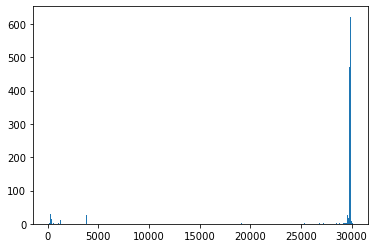

In [16]:
plt.figure()
ax=plt.gca()
ax.hist(ll, bins=500)
plt.show()

In [22]:
np.max(ll)

30129

# Test loading aligned fasta

In [61]:
%%time
fiter = fasta_iter("./data/oct20/sequences_2020-10-30_07-23.fasta")
iids = np.array([ff[0] for ff in fiter])

CPU times: user 5.69 s, sys: 3.06 s, total: 8.76 s
Wall time: 22.4 s


In [62]:
len(iids)

166919

In [63]:
iids

array(['Wuhan/IVDC-HB-01/2019', 'Wuhan/IVDC-HB-04/2020',
       'Wuhan/IVDC-HB-05/2019', ..., 'Australia/SAP521/2020',
       'Australia/SAP522/2020', 'Australia/SAP516/2020'], dtype='<U47')

In [ ]:
%%time
fiter = fasta_iter_raw("./data/oct20/sequences_2020-10-30_07-23.fasta.gz", gzip=True)
seqs = np.array([ff[1] for ff in fiter])